In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, TimeDistributed, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/mhealth_full.csv'
df= pd.read_csv(path)
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [5]:
columns = ['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z']


In [6]:
def scaler(data, columns):

  for column in columns:
        data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
  return data
df = scaler(df, columns)

    0: 'Null',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'

In [7]:

df_activity_1 = df[df['activity'] == 1]
df_activity_2 = df[df['activity'] == 2]
df_activity_3 = df[df['activity'] == 3]
#df_activity_4 = df[df['activity'] == 4]
#df_activity_5 = df[df['activity'] == 5]
#df_activity_6 = df[df['activity'] == 6]
#df_activity_7 = df[df['activity'] == 7]
#df_activity_8 = df[df['activity'] == 8]
#df_activity_9 = df[df['activity'] == 9]
#df_activity_10 = df[df['activity'] == 10]
#df_activity_11 = df[df['activity'] == 11]
#df_activity_12 = df[df['activity'] == 12]

In [8]:
df = pd.concat([df_activity_1, df_activity_2, df_activity_3])

In [9]:
df.loc[df['activity'] == 3, 'activity'] = 0

In [10]:
df.activity.value_counts()

1    30720
2    30720
0    30720
Name: activity, dtype: int64

In [11]:
#X = df.drop(['activity', 'subject'], axis=1)
#y = df['activity']

In [33]:
TIME_PERIODS = 50
STEP_DISTANCE = 25
LABEL = 'activity'

def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels
X_data, y_data = create_segments_and_labels(df, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

reshaped_segments shape :  (3685, 50, 21)
labels shape : (3685,)


In [34]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1, stratify=  y_data)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2948, 50, 21), (737, 50, 21), (2948,), (737,))

In [36]:
# Scale train/ test predictors based on training data
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [37]:
# Create train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1,stratify=  y_train)

In [38]:
# Convert output variables to categorical for CNN
y_train = to_categorical(y_train)
print(y_train.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

y_val = to_categorical(y_val)
print(y_val.shape)

(2358, 3)
(737, 3)
(590, 3)


# CNN - LSTM

In [39]:
#Epoch 500

BATCH_SIZE = 32

verbose,epochs,batch_size=1,10, BATCH_SIZE
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps,n_features,n_outputs

(50, 21, 3)

In [40]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2358, 50, 21) (2358, 3) (737, 50, 21) (737, 3)


In [47]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing'
        #3: 'Walking',
        #4: 'Climbing stairs',
        #5: 'Waist bends forward',
        #6: 'Frontal elevation of arms',
        #7: 'Knees bending (crouching)',
        #8: 'Cycling',
        #9: 'Jogging',
        #10: 'Running',
        #11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

# Layer3

# CNN1 - LSTM2

In [42]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 48, 64)            4096      
                                                                 
 dropout_2 (Dropout)         (None, 48, 64)            0         
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 24, 100)           66000     
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                      

In [43]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 7s 31ms/step - loss: 0.3371 - accuracy: 0.8499 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 13ms/step - loss: 0.0391 - accuracy: 0.9885 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 11ms/step - loss: 0.0086 - accuracy: 0.9992 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 9ms/step - loss: 0.0039 - accuracy: 0.9996 - val_loss: 4.6546e-04 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 10ms/step - loss: 9.6783e-04 - accuracy: 1.0000 - val_loss: 2.3759e-04 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 10ms/step - loss: 6.3932e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0029 - accuracy: 0.9987 - val_loss: 7.1758e-05 - val_accuracy: 1

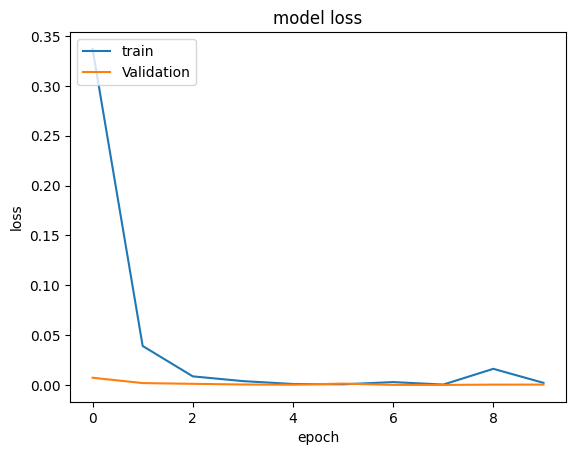

In [44]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

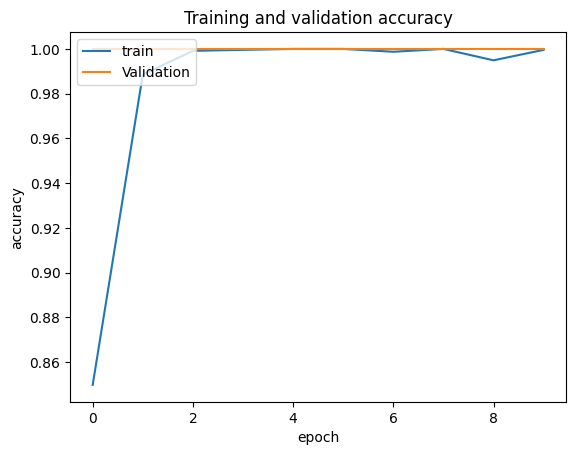

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 0s 3ms/step


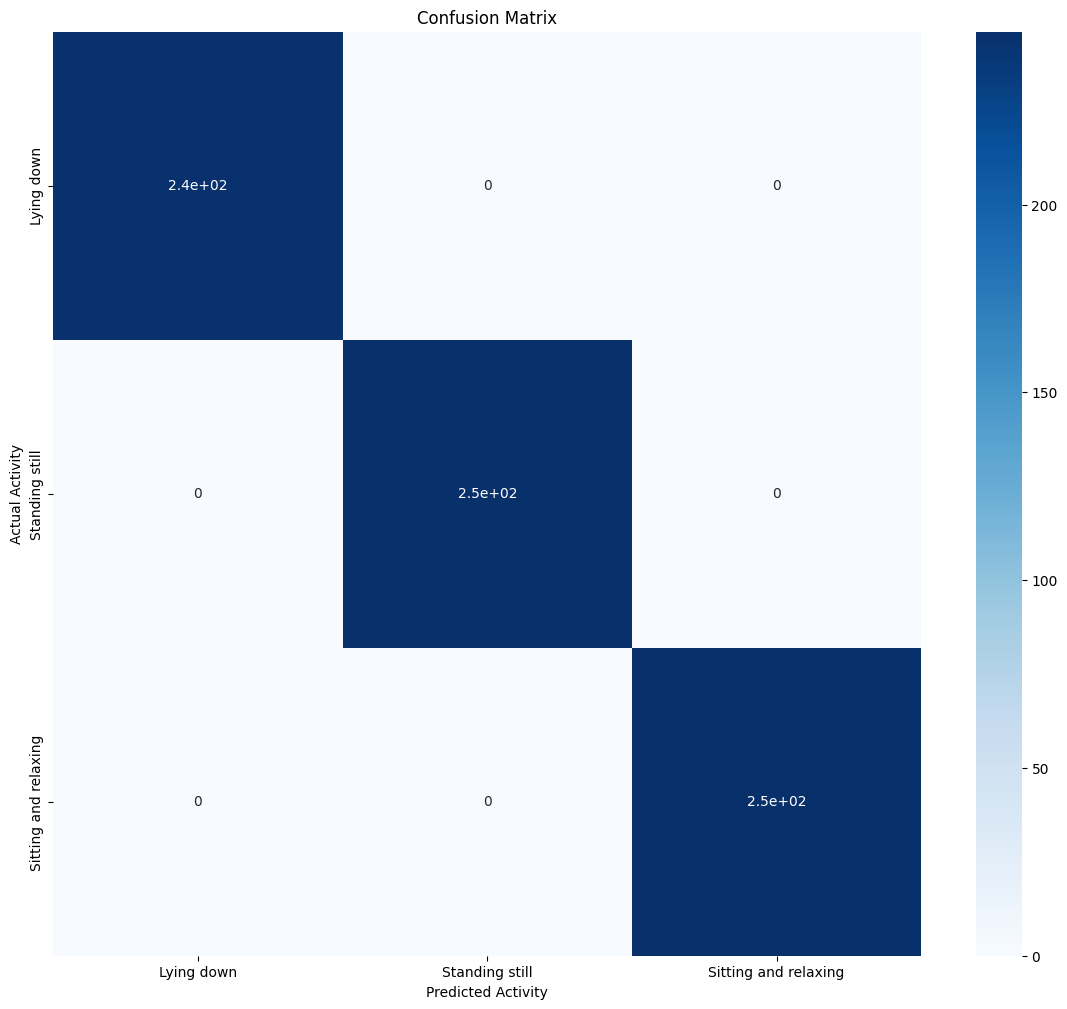

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [48]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM1

In [49]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 48, 64)            4096      
                                                                 
 conv1d_3 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 dropout_4 (Dropout)         (None, 46, 64)            0         
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 lstm_4 (LSTM)               (None, 100)               66000     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                      

In [50]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 7s 32ms/step - loss: 0.4289 - accuracy: 0.8045 - val_loss: 0.0570 - val_accuracy: 0.9729
Epoch 2/10
74/74 [==============================] - 1s 16ms/step - loss: 0.0254 - accuracy: 0.9953 - val_loss: 1.0655 - val_accuracy: 0.7525
Epoch 3/10
74/74 [==============================] - 1s 13ms/step - loss: 0.0302 - accuracy: 0.9915 - val_loss: 5.6705e-04 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 14ms/step - loss: 0.0032 - accuracy: 0.9987 - val_loss: 2.1271e-04 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 12ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 4.0908e-04 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 10ms/step - loss: 6.0496e-04 - accuracy: 1.0000 - val_loss: 9.1689e-05 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 12ms/step - loss: 3.2592e-04 - accuracy: 1.0000 - val_loss: 5.4434e-05 - val_ac

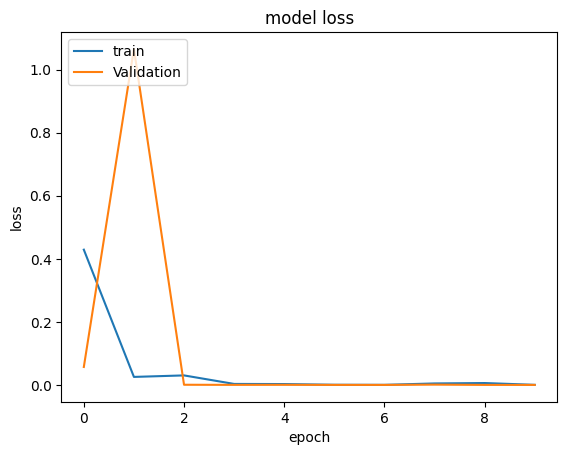

In [51]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

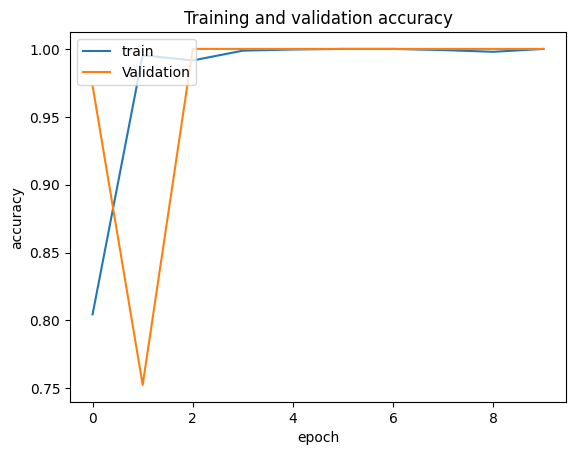

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

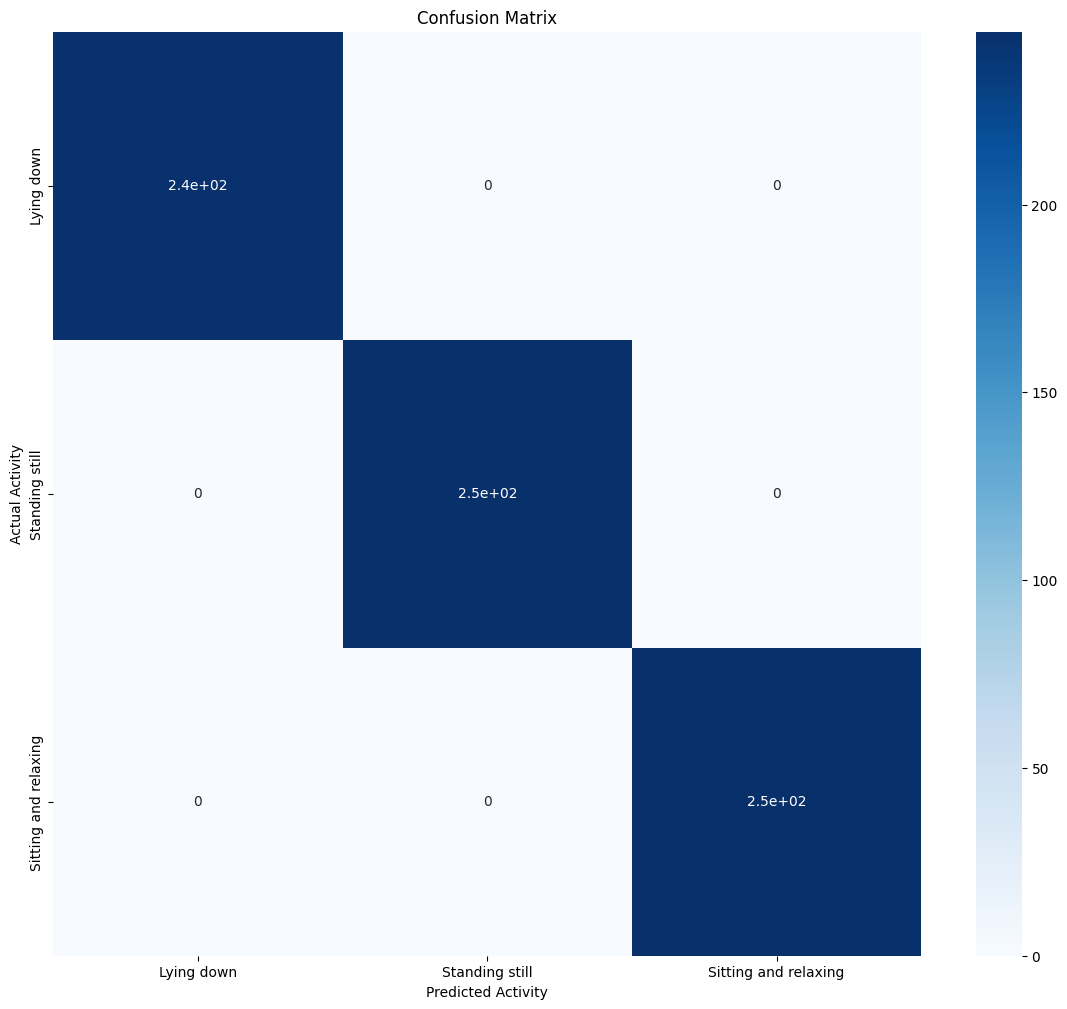

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [53]:

y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# Layer 4

# CNN1 - LSTM3

In [54]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 48, 64)            4096      
                                                                 
 dropout_6 (Dropout)         (None, 48, 64)            0         
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 lstm_5 (LSTM)               (None, 24, 100)           66000     
                                                                 
 lstm_6 (LSTM)               (None, 24, 100)           80400     
                                                                 
 lstm_7 (LSTM)               (None, 100)               80400     
                                                      

In [55]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 14s 72ms/step - loss: 0.3369 - accuracy: 0.8388 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 2s 28ms/step - loss: 0.0299 - accuracy: 0.9915 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 19ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.7341e-04 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 2s 23ms/step - loss: 0.0122 - accuracy: 0.9970 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 2s 24ms/step - loss: 0.0052 - accuracy: 0.9996 - val_loss: 1.0242e-04 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 2s 20ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.0300 - val_accuracy: 0.9780
Epoch 7/10
74/74 [==============================] - 1s 18ms/step - loss: 0.0073 - accuracy: 0.9975 - val_loss: 2.3142e-04 - val_accuracy: 1.0000


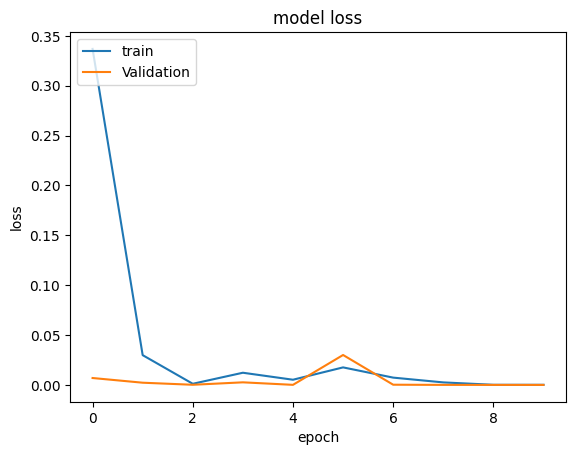

In [56]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

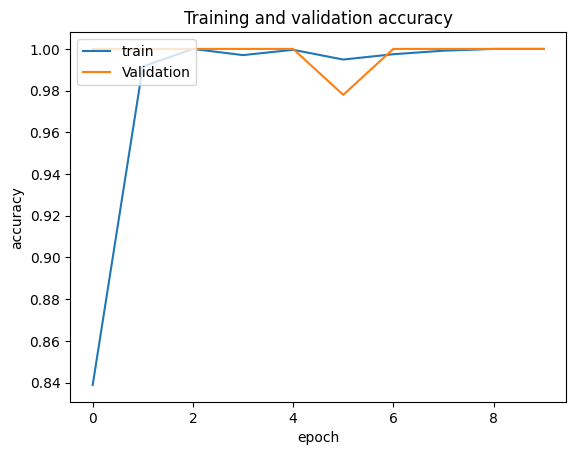

In [57]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 2s 8ms/step


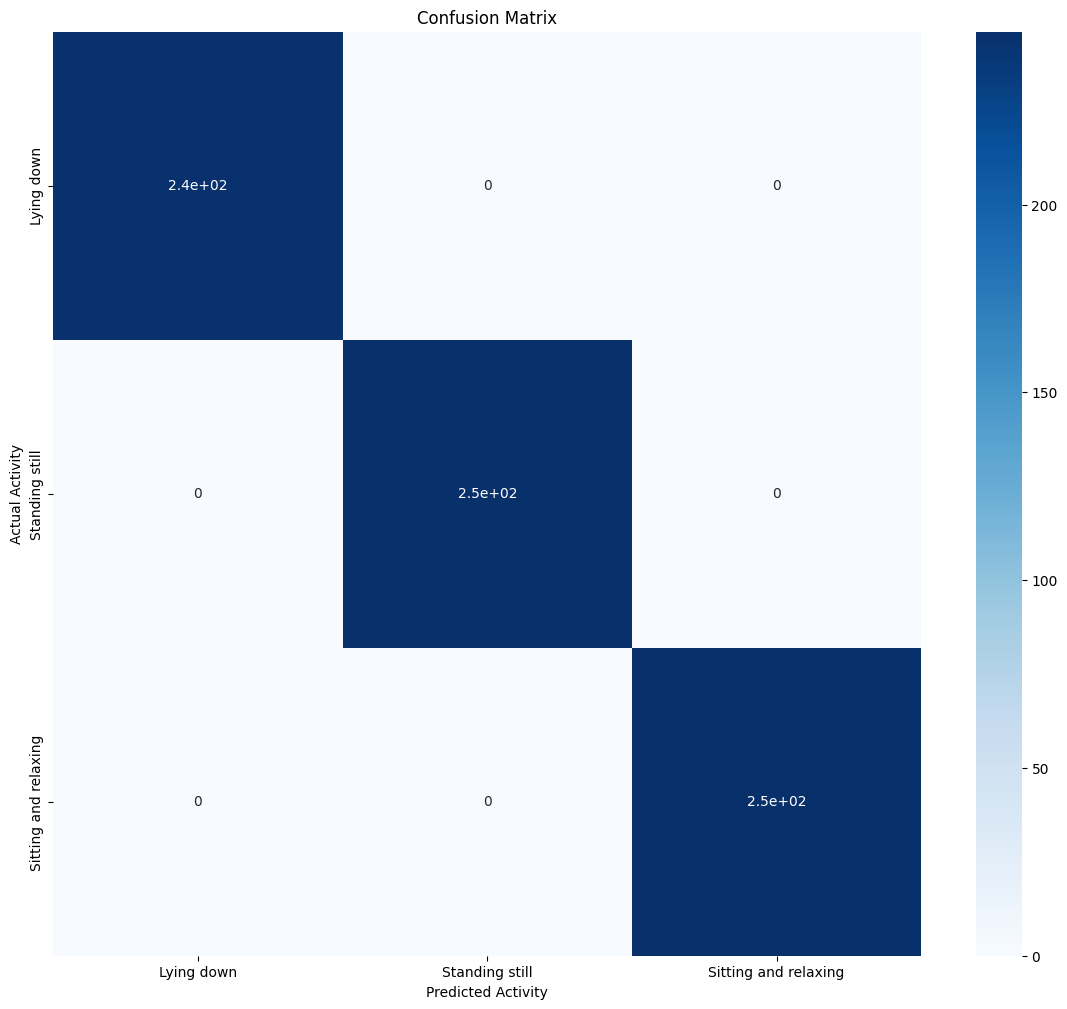

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [58]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM2

In [59]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 48, 64)            4096      
                                                                 
 conv1d_6 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 dropout_8 (Dropout)         (None, 46, 64)            0         
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 lstm_8 (LSTM)               (None, 23, 100)           66000     
                                                                 
 lstm_9 (LSTM)               (None, 100)               80400     
                                                      

In [60]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 6s 21ms/step - loss: 0.3473 - accuracy: 0.8456 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0279 - accuracy: 0.9919 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0067 - accuracy: 0.9983 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 11ms/step - loss: 8.9083e-04 - accuracy: 1.0000 - val_loss: 1.4317e-04 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 15ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 1.3191e-04 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 18ms/step - loss: 0.0293 - accuracy: 0.9902 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 18ms/step - loss: 6.8165e-04 - accuracy: 1.0000 - val_loss: 1.2620e-04 - val_accuracy: 

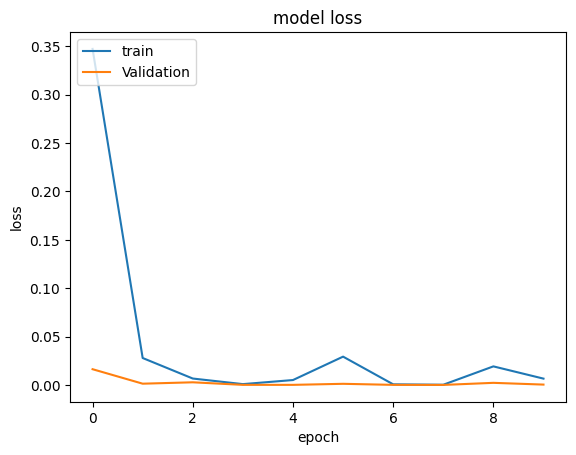

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

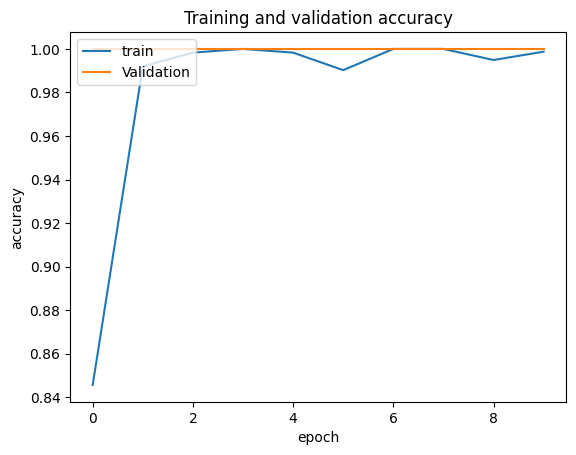

In [62]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 1s 5ms/step


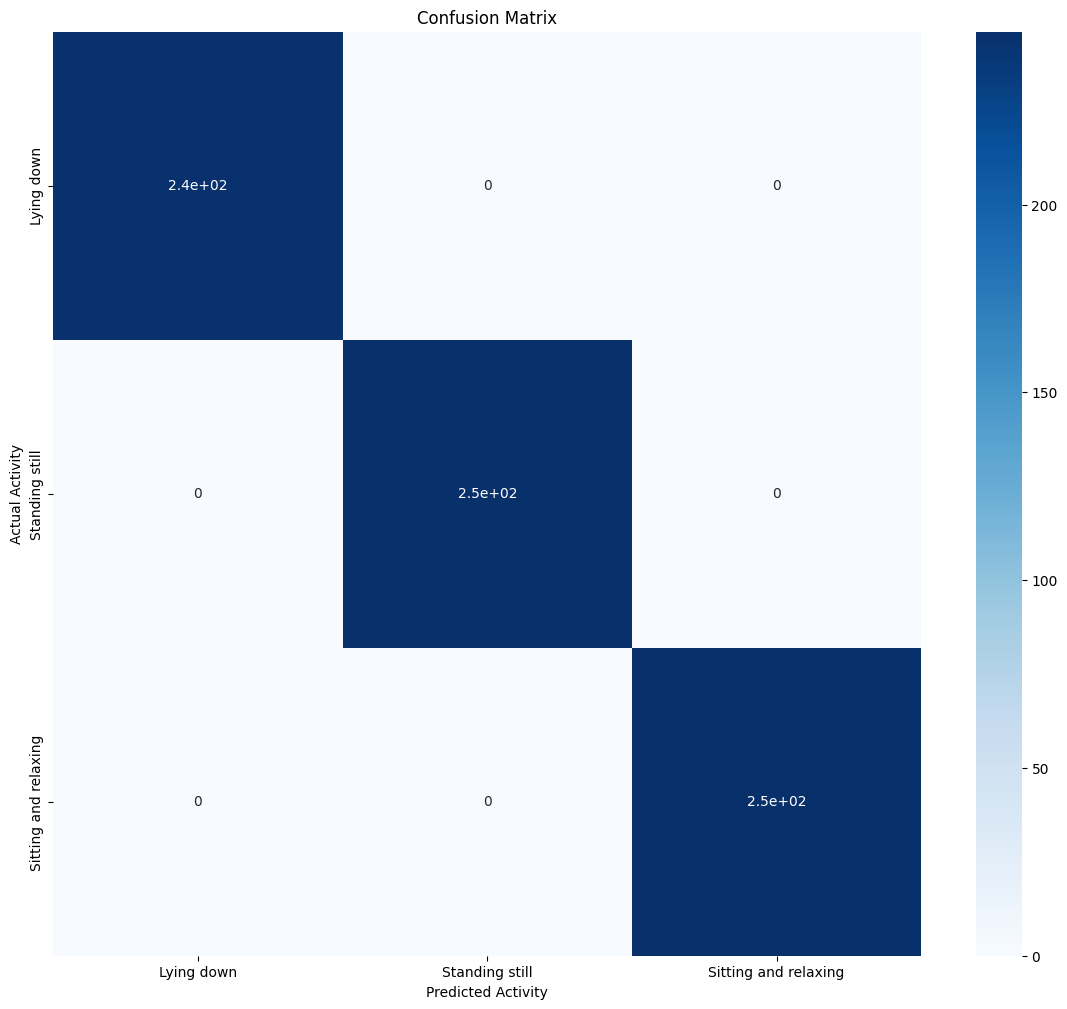

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [63]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN3 - LSTM1

In [64]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 48, 64)            4096      
                                                                 
 conv1d_8 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 dropout_10 (Dropout)        (None, 46, 64)            0         
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 23, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 21, 64)            12352     
                                                                 
 dropout_11 (Dropout)        (None, 21, 64)            0         
                                                      

In [65]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 11s 49ms/step - loss: 0.4162 - accuracy: 0.7901 - val_loss: 0.0967 - val_accuracy: 0.9458
Epoch 2/10
74/74 [==============================] - 1s 19ms/step - loss: 0.0405 - accuracy: 0.9864 - val_loss: 0.4318 - val_accuracy: 0.8678
Epoch 3/10
74/74 [==============================] - 1s 16ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 2.2624e-04 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 15ms/step - loss: 9.0590e-04 - accuracy: 1.0000 - val_loss: 8.5978e-04 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 17ms/step - loss: 3.5936e-04 - accuracy: 1.0000 - val_loss: 1.5307e-04 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 16ms/step - loss: 4.1704e-04 - accuracy: 1.0000 - val_loss: 4.2962e-05 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 16ms/step - loss: 0.0227 - accuracy: 0.9924 - val_loss: 0.0076 - val_a

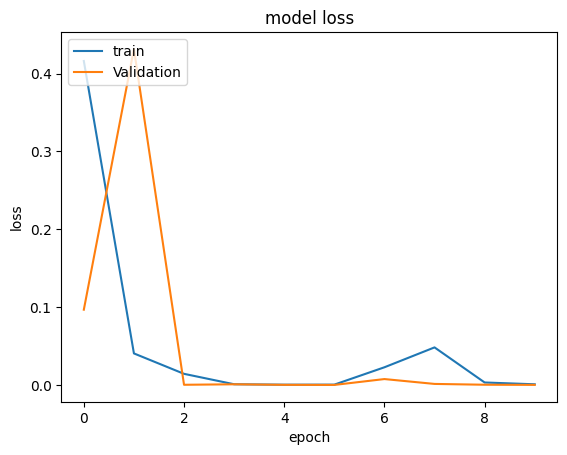

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

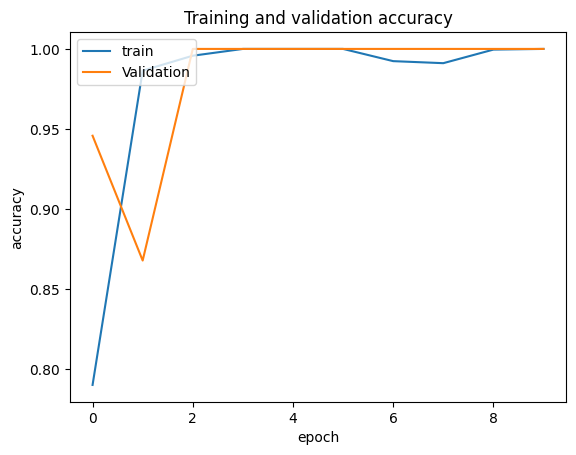

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 2s 6ms/step


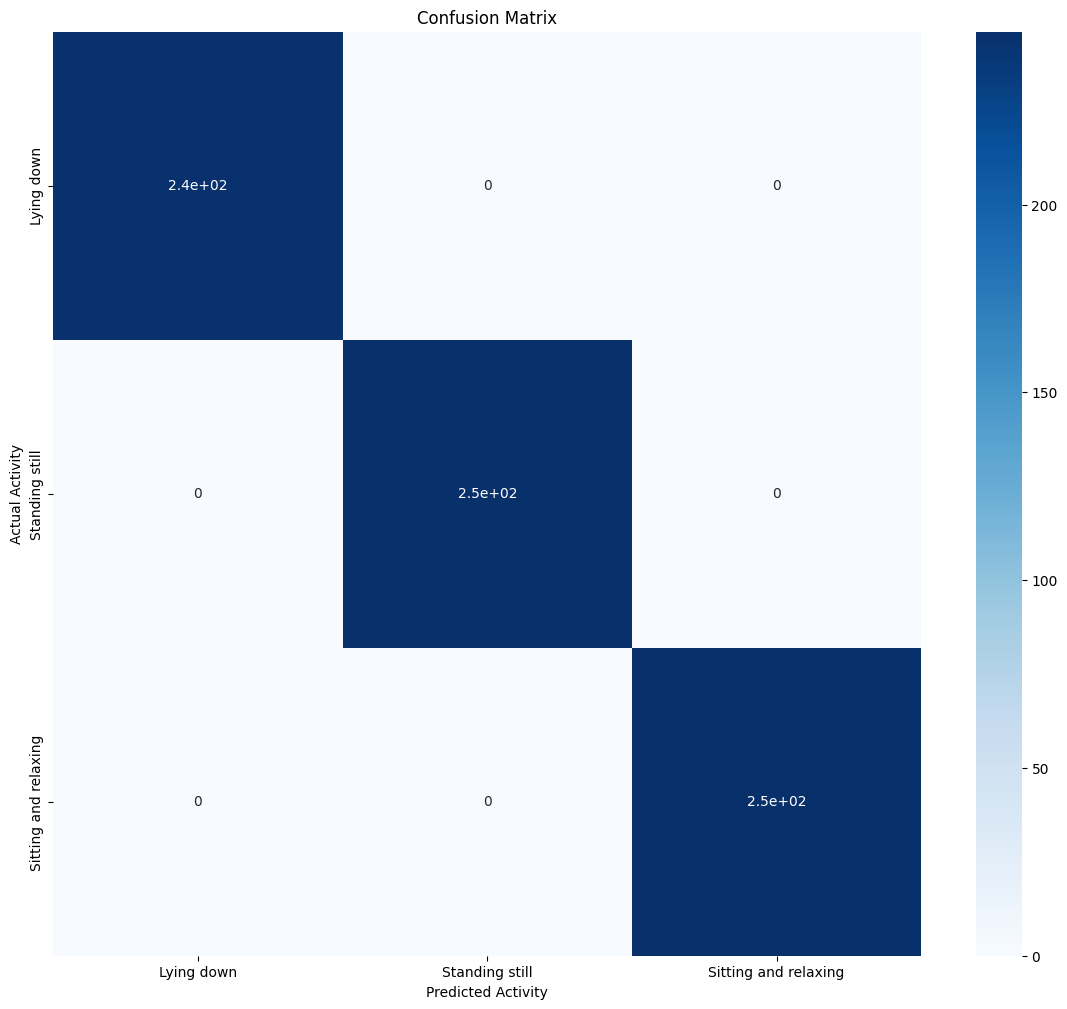

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [68]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# Layer5

# CNN4 - LSTM1

In [68]:

# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))

model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))

model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [69]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 1s 10ms/step - loss: 4.1950e-04 - accuracy: 1.0000 - val_loss: 6.8017e-05 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 11ms/step - loss: 0.0015 - accuracy: 0.9992 - val_loss: 5.8668e-05 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 10ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 6.7961e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 10ms/step - loss: 2.6663e-04 - accuracy: 1.0000 - val_loss: 5.5720e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 10ms/step - loss: 1.6330e-04 - accuracy: 1.0000 - val_loss: 4.1741e-05 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 11ms/step - loss: 1.4744e-04 - accuracy: 1.0000 - val_loss: 3.2119e-05 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 10ms/step - loss: 1.0639e-04 - accuracy: 1.0000 - val_loss:

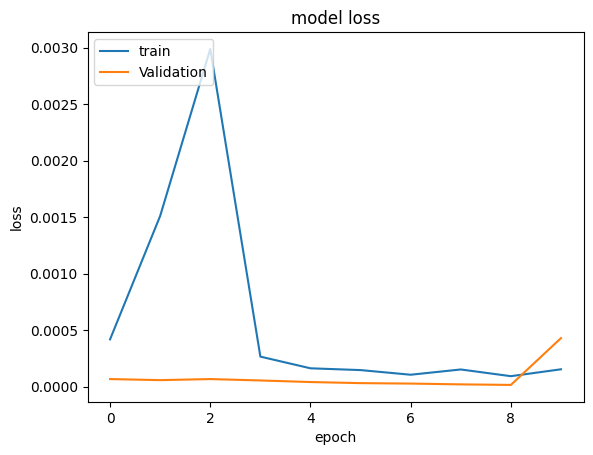

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

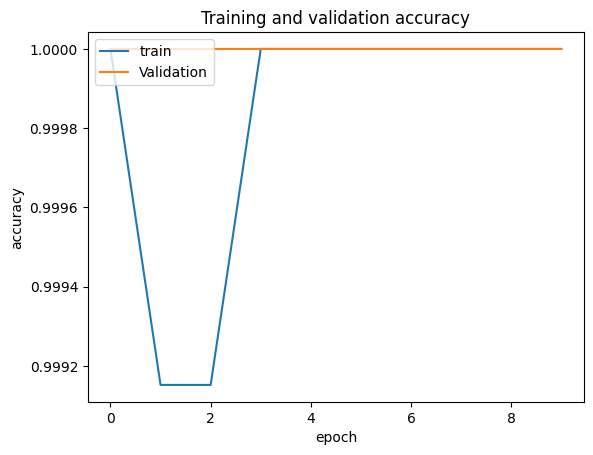

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

24/24 [==============================] - 0s 3ms/step


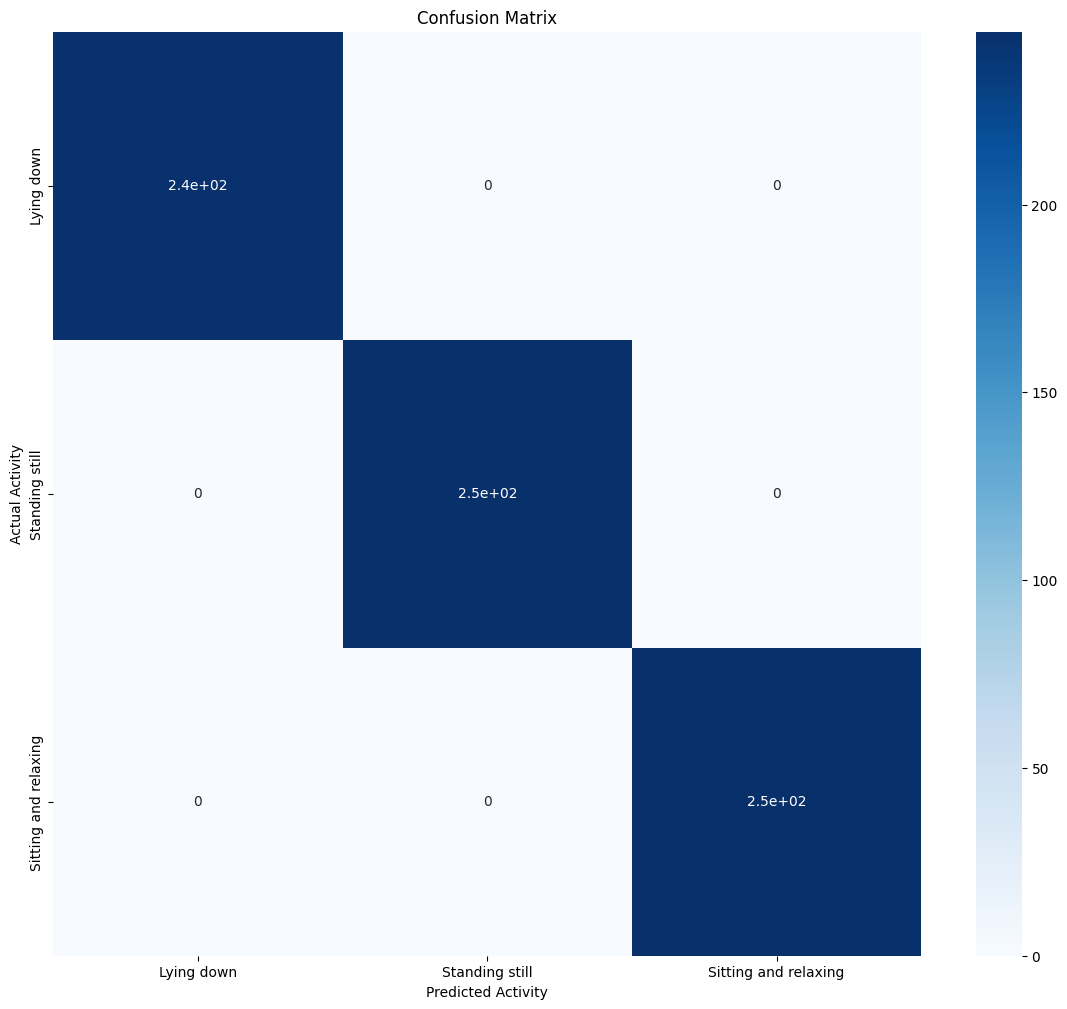

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [72]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# Timedistributed

In [ ]:
#Epoch 500

BATCH_SIZE = 32

verbose,epochs,batch_size=1,10, BATCH_SIZE
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps,n_features,n_outputs

In [17]:
n_steps = 2
n_features = X_train.shape[2]
n_length = 25

X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))
X_val = X_val.reshape((X_val.shape[0], n_steps, n_length, n_features))

In [18]:
print(X_train.shape, y_train.shape)

(2358, 2, 25, 21) (2358,)


(2358, 3)
(737, 3)
(590, 3)


In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2358, 2, 25, 21) (2358, 3) (736, 2, 25, 21) (736, 3)


In [ ]:
# Produce variables for CNN input/output shape
#Epoch 500
n_timesteps, n_features, n_outputs = n_steps * n_length, X_train.shape[3], y_train.shape[1]
#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps,n_features,n_outputs

(50, 21, 3)

# Training

# CNN1 - LSTM1

In [ ]:
# Model 1
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))

model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_49 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_50 (TimeD  (None, None, 23, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_51 (TimeD  (None, None, 11, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_52 (TimeD  (None, None, 704)         0         
 istributed)                                                     
                                                                 
 lstm_8 (LSTM)               (None, 100)             

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 4s 12ms/step - loss: 0.1453 - accuracy: 0.9546 - val_loss: 6.7200e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 0s 6ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1360e-04 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 0s 6ms/step - loss: 7.6743e-04 - accuracy: 1.0000 - val_loss: 5.4435e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 9ms/step - loss: 6.1598e-04 - accuracy: 1.0000 - val_loss: 2.7214e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 8ms/step - loss: 2.7898e-04 - accuracy: 1.0000 - val_loss: 1.6578e-05 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 8ms/step - loss: 1.4434e-04 - accuracy: 1.0000 - val_loss: 1.0236e-05 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 8ms/step - loss: 9.9889e-05 - accuracy: 1.0000 - val_loss: 7.849

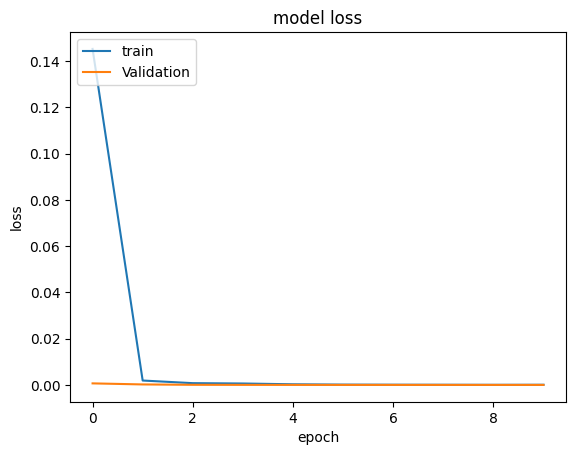

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

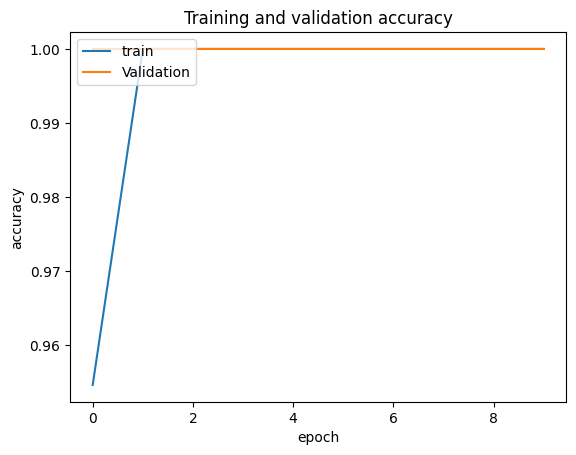

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

24/24 [==============================] - 0s 4ms/step


(737, 1)

In [ ]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]

# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_sequences(full_set, 25)
print(X_seq.shape, y_seq.shape)

(92136, 25, 21) (92136,)


In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing'
        #3: 'Walking',
        #4: 'Climbing stairs',
        #5: 'Waist bends forward',
        #6: 'Frontal elevation of arms',
        #7: 'Knees bending (crouching)',
        #8: 'Cycling',
        #9: 'Jogging',
        #10: 'Running',
        #11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

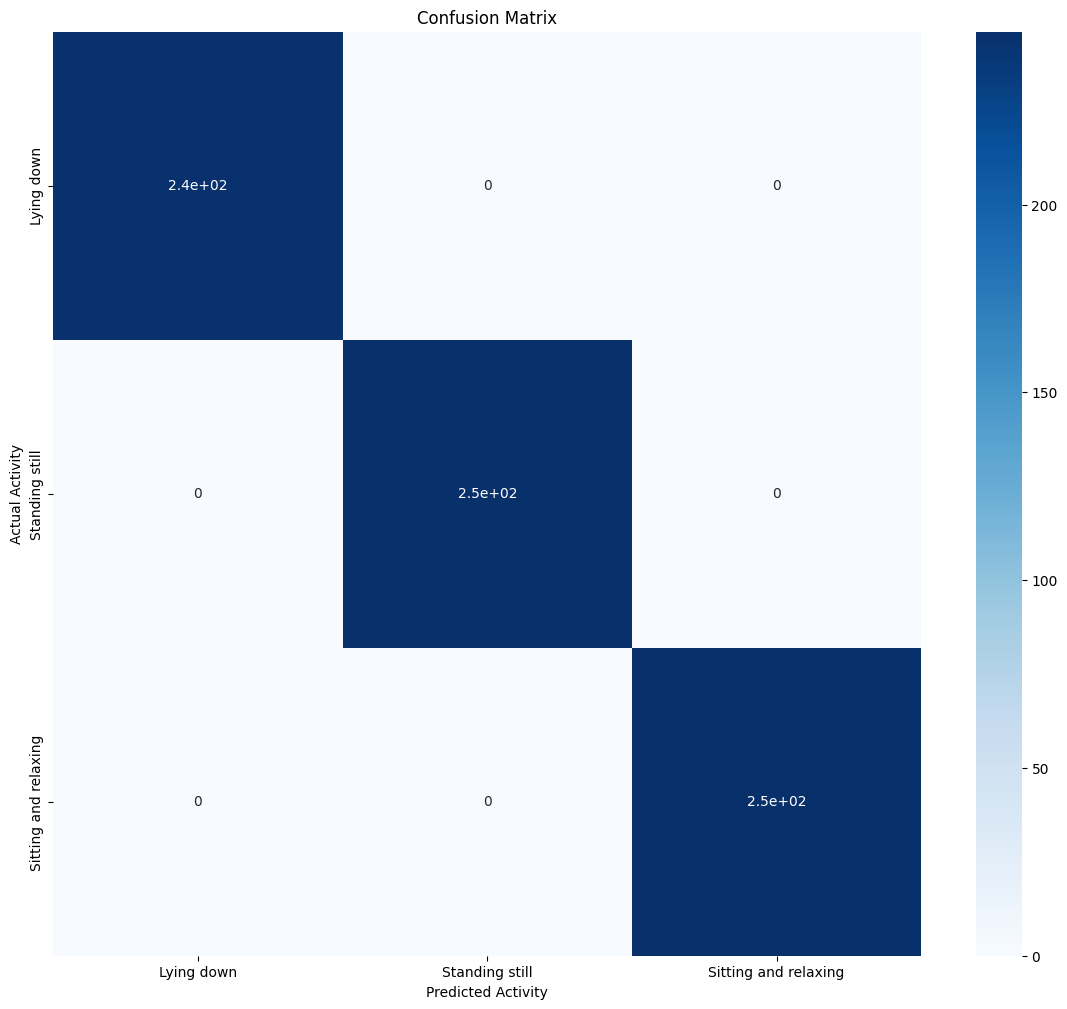

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN1 - LSTM2

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_53 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_54 (TimeD  (None, None, 23, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_55 (TimeD  (None, None, 11, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_56 (TimeD  (None, None, 704)         0         
 istributed)                                                     
                                                                 
 lstm_9 (LSTM)               (None, None, 100)       

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 6s 24ms/step - loss: 0.2458 - accuracy: 0.9088 - val_loss: 1.0083e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 11ms/step - loss: 0.0032 - accuracy: 0.9996 - val_loss: 3.4472e-05 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 12ms/step - loss: 4.3336e-04 - accuracy: 1.0000 - val_loss: 1.2693e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 11ms/step - loss: 3.5254e-04 - accuracy: 1.0000 - val_loss: 6.1896e-06 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 10ms/step - loss: 1.5110e-04 - accuracy: 1.0000 - val_loss: 3.8112e-06 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 8ms/step - loss: 2.7286e-04 - accuracy: 1.0000 - val_loss: 2.8616e-06 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 8ms/step - loss: 1.1819e-04 - accuracy: 1.0000 - val_loss: 1

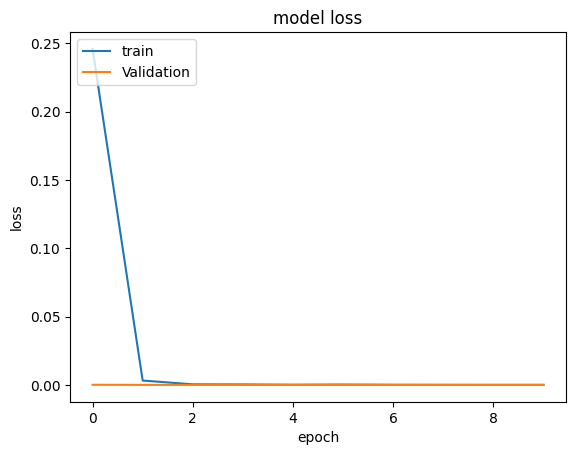

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

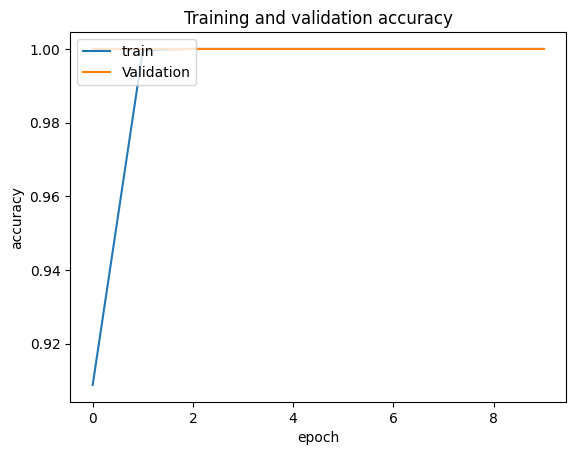

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

24/24 [==============================] - 1s 3ms/step


(737, 1)

In [ ]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]

# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_sequences(full_set, 25)
print(X_seq.shape, y_seq.shape)

(92136, 25, 21) (92136,)


In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing'
        #3: 'Walking',
        #4: 'Climbing stairs',
        #5: 'Waist bends forward',
        #6: 'Frontal elevation of arms',
        #7: 'Knees bending (crouching)',
        #8: 'Cycling',
        #9: 'Jogging',
        #10: 'Running',
        #11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

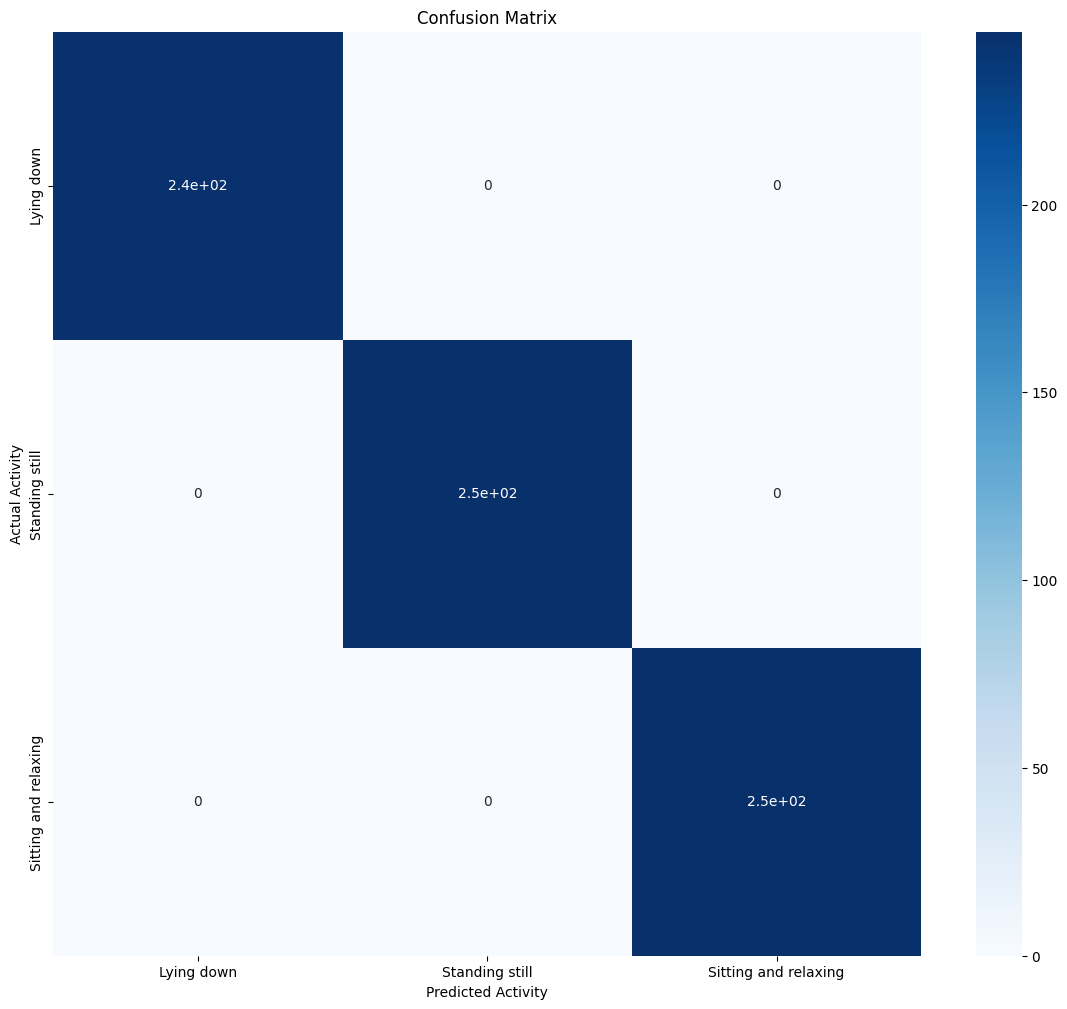

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM1

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))


model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_57 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_58 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_59 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_60 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_61 (TimeD  (None, None, 640)       

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 9s 22ms/step - loss: 0.1727 - accuracy: 0.9364 - val_loss: 2.6972e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 0.9996 - val_loss: 7.8030e-05 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 0s 7ms/step - loss: 5.1374e-04 - accuracy: 1.0000 - val_loss: 3.3795e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 0s 6ms/step - loss: 2.6843e-04 - accuracy: 1.0000 - val_loss: 1.9048e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 7ms/step - loss: 1.7627e-04 - accuracy: 1.0000 - val_loss: 1.2050e-05 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 0s 6ms/step - loss: 1.1341e-04 - accuracy: 1.0000 - val_loss: 8.7600e-06 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 0s 7ms/step - loss: 1.1337e-04 - accuracy: 1.0000 - val_loss: 5.648

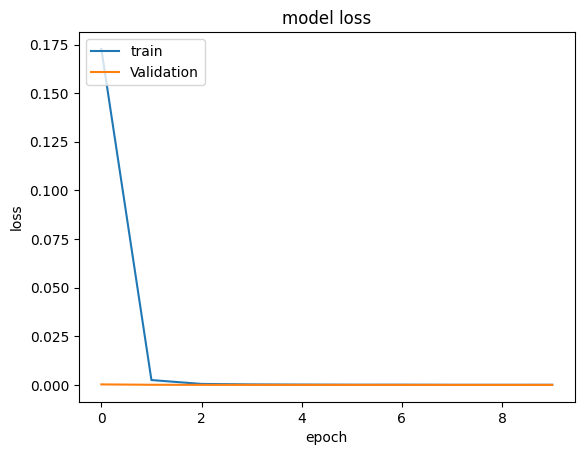

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

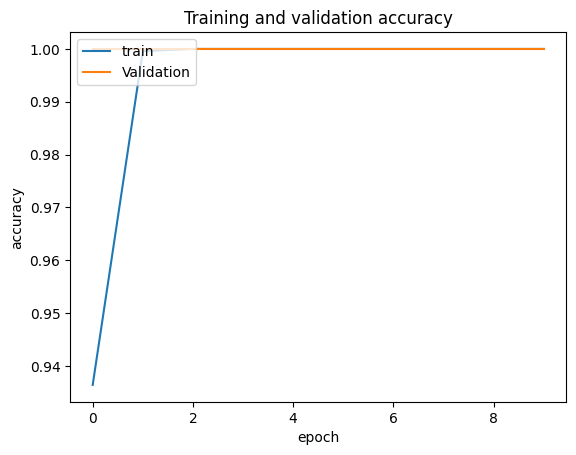

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

24/24 [==============================] - 1s 5ms/step


(737, 1)

In [ ]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]

# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_sequences(full_set, 25)
print(X_seq.shape, y_seq.shape)

(92136, 25, 21) (92136,)


In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing'
        #3: 'Walking',
        #4: 'Climbing stairs',
        #5: 'Waist bends forward',
        #6: 'Frontal elevation of arms',
        #7: 'Knees bending (crouching)',
        #8: 'Cycling',
        #9: 'Jogging',
        #10: 'Running',
        #11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

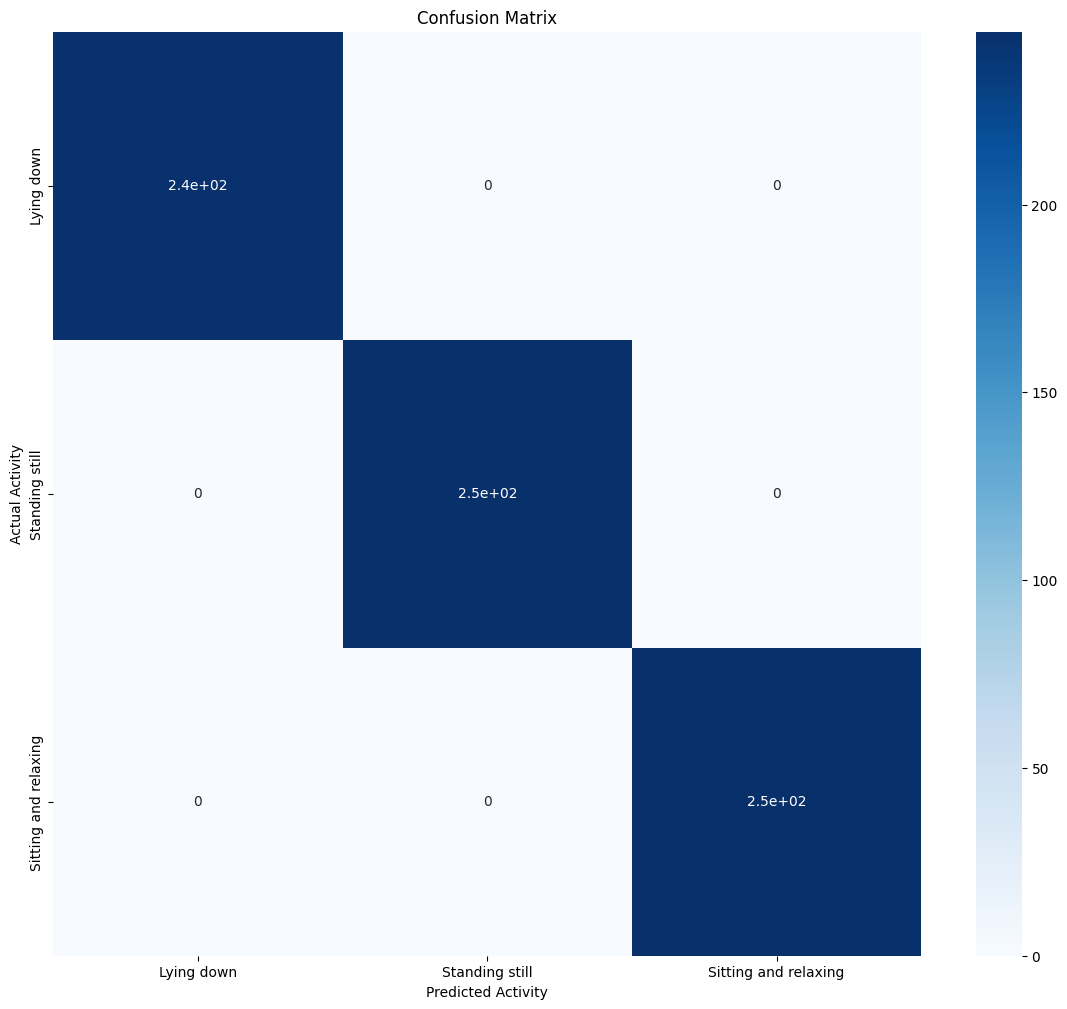

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM2

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_62 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_63 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_64 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_65 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_66 (TimeD  (None, None, 640)       

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
74/74 [==============================] - 6s 19ms/step - loss: 0.2838 - accuracy: 0.9016 - val_loss: 2.3090e-04 - val_accuracy: 1.0000
Epoch 2/10
74/74 [==============================] - 1s 8ms/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 1.1265e-04 - val_accuracy: 1.0000
Epoch 3/10
74/74 [==============================] - 1s 8ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 6.2526e-05 - val_accuracy: 1.0000
Epoch 4/10
74/74 [==============================] - 1s 8ms/step - loss: 4.7518e-04 - accuracy: 1.0000 - val_loss: 1.4220e-05 - val_accuracy: 1.0000
Epoch 5/10
74/74 [==============================] - 1s 8ms/step - loss: 2.2406e-04 - accuracy: 1.0000 - val_loss: 6.9592e-06 - val_accuracy: 1.0000
Epoch 6/10
74/74 [==============================] - 1s 8ms/step - loss: 1.2470e-04 - accuracy: 1.0000 - val_loss: 4.1721e-06 - val_accuracy: 1.0000
Epoch 7/10
74/74 [==============================] - 1s 8ms/step - loss: 1.5145e-04 - accuracy: 1.0000 - val_loss: 2.4684e-0

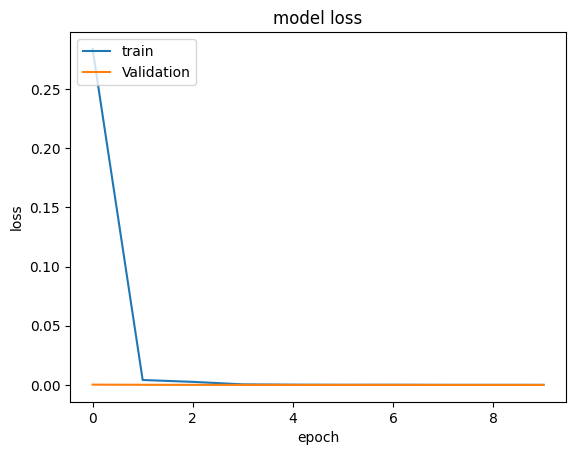

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

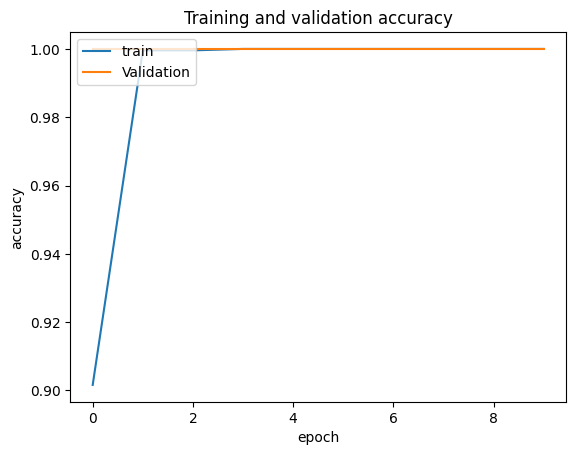

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

24/24 [==============================] - 1s 3ms/step


(737, 1)

In [ ]:
# Transform full data set for use in cross-validation
# Merge X/y data to apply sequence transformation function
y_array = np.array(y)
full_set = np.c_[X_scaled, y_array]

# Apply sequence transformation using time step of 25 for both train and test data
X_seq, y_seq = split_sequences(full_set, 25)
print(X_seq.shape, y_seq.shape)

(92136, 25, 21) (92136,)


In [ ]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        0: 'Lying down',
        1: 'Standing still',
        2: 'Sitting and relaxing'
        #3: 'Walking',
        #4: 'Climbing stairs',
        #5: 'Waist bends forward',
        #6: 'Frontal elevation of arms',
        #7: 'Knees bending (crouching)',
        #8: 'Cycling',
        #9: 'Jogging',
        #10: 'Running',
        #11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

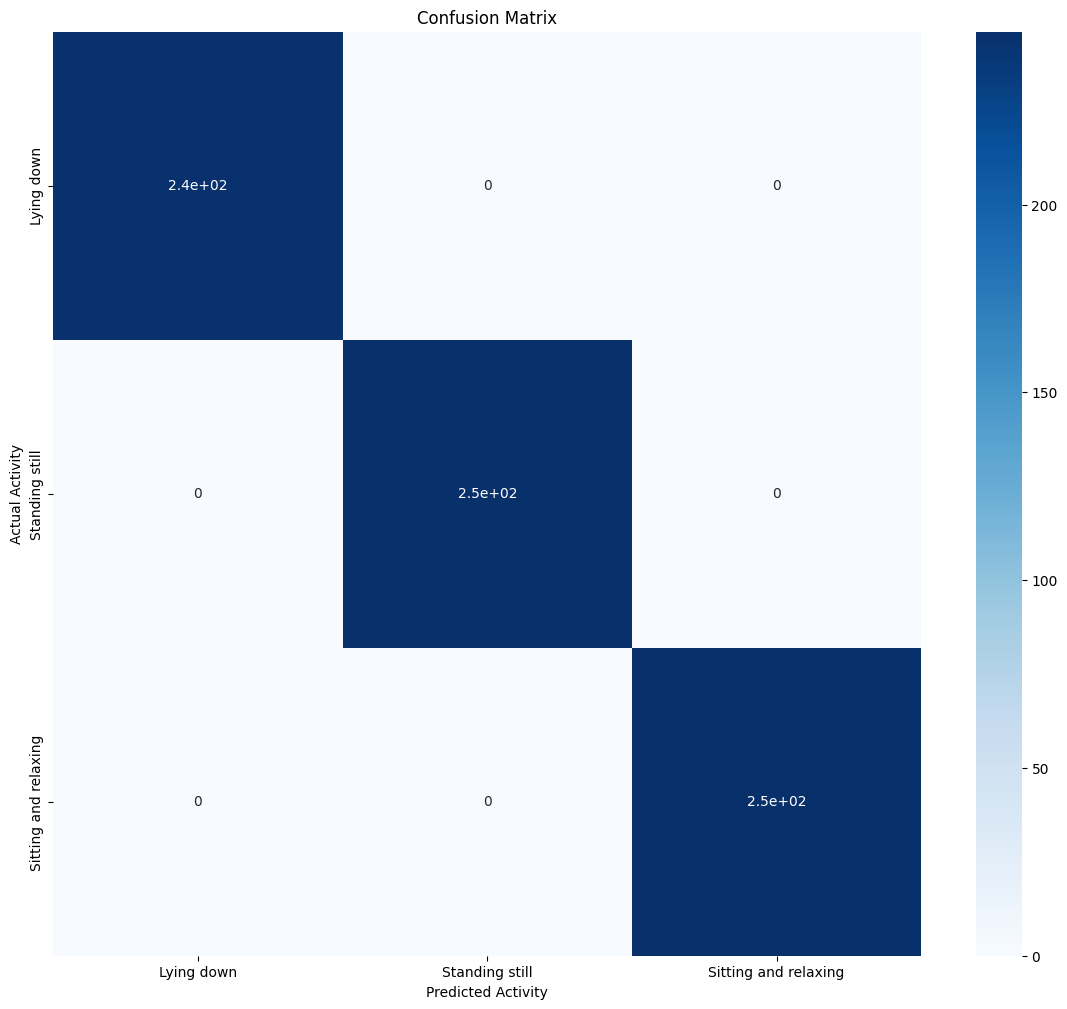

Accuracy Score: 100.0000%
Precision Score: 100.0000%
Recall Score: 100.0000%
F_1 Score: 100.0000%


In [ ]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)